In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
planes = pd.read_csv("planes.csv")
planes.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0


In [3]:
planes.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10655,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107.0
10656,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145.0
10657,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,NaN,11:20,3h,non-stop,NaN,7229.0
10658,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648.0
10659,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753.0


# EDA
### Why perform EDA ?
(1) To detect patterns and relationships <br>
(2) To Generate questions or Hypotheses <br>
(3) To Prepare data for machine learning 

### Why is missing data a problem?

(1) It affects distributions <br>
(2) It is less representative <br>
(3) It can result in drawing incorrect conclusions.

In [4]:
#checking for missing values
print(planes.isna().sum())

Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64


### Strategies for addressing missing data
(1) Drop missing values - 5% or less of total values <br>
(2) Impute, mean, median and mode - Depends on distribution and context <br>
(3) Impute by sub groups - Different exp levels have different median values <br>

In [5]:
#finding 5% threshold
threshold = len(planes) * 0.05
threshold

533.0

In [6]:
#Dropping missing values
cols_to_drop = planes.columns[planes.isna().sum() <= threshold]
print(cols_to_drop)

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops'],
      dtype='object')


In [7]:
#Drop 
planes.dropna(subset=cols_to_drop, inplace=True)
print(planes.isna().sum())

Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info    300
Price              368
dtype: int64


In [8]:
#checking the values of additional_info column
print(planes["Additional_Info"].value_counts())

No info                         6399
In-flight meal not included     1525
No check-in baggage included     258
1 Long layover                    14
Change airports                    7
No Info                            2
Business class                     1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64


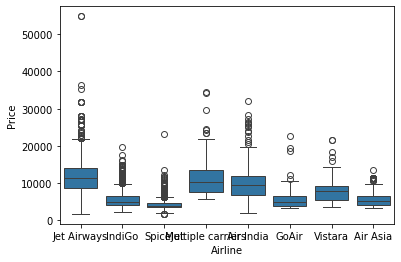

In [9]:
#Plotting plot
sns.boxplot(data=planes, x="Airline", y="Price")
plt.show()

In [10]:
planes = planes.drop("Additional_Info", axis=1) #Drop Additional_Info column

In [11]:
planes["Price"] = planes.groupby('Airline')["Price"].transform(lambda x: x.fillna(x.median()))

In [12]:
print(planes.isna().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Price              0
dtype: int64


In [13]:
# Calculate median plane ticket prices by Airline
airline_prices = planes.groupby("Airline")["Price"].median()

print(airline_prices)

Airline
Air Asia              5192.0
Air India             9443.0
GoAir                 5003.5
IndiGo                5054.0
Jet Airways          11507.0
Multiple carriers    10197.0
SpiceJet              3873.0
Vistara               8028.0
Name: Price, dtype: float64


In [14]:
# Convert to a dictionary
prices_dict = airline_prices.to_dict()

# Map the dictionary to the missing values
planes["Price"] = planes["Price"].fillna(planes["Airline"].map(prices_dict))

# Check for missing values
print(planes.isna().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Price              0
dtype: int64


### Categorical data manipulation and analysis

In [15]:
# Filter the DataFrame for object columns
non_numeric = planes.select_dtypes("object")

In [16]:
# Loop through columns
for col in non_numeric.columns:
    print("Number of unique values in {col} column: ", non_numeric[col].nunique())

Number of unique values in {col} column:  8
Number of unique values in {col} column:  44
Number of unique values in {col} column:  5
Number of unique values in {col} column:  6
Number of unique values in {col} column:  122
Number of unique values in {col} column:  218
Number of unique values in {col} column:  1220
Number of unique values in {col} column:  362
Number of unique values in {col} column:  5


In [17]:
#Flight duration categories
planes['Duration'].head() 

#Think so this wont be simple to convert to numbers

0        19h
1     5h 25m
2     4h 45m
3     2h 25m
4    15h 30m
Name: Duration, dtype: object

In [18]:
#Creating new coloums in planes DataFrame 
flight_categories = ["Short-haul", "Medium", "Long-haul"]

# Create short_flights
short_flights = "^0h|^1h|^2h|^3h|^4h"

# Create medium_flights
medium_flights = "^5h|^6h|^7h|^8h|^9h"

# Create long_flights
long_flights = "10h|11h|12h|13h|14h|15h|16h"

In [19]:
# Create conditions for values in flight_categories to be created
conditions = [
    (planes["Duration"].str.contains(short_flights)),
    (planes["Duration"].str.contains(medium_flights)),
    (planes["Duration"].str.contains(long_flights))
]

#Applying the condition list to the flight_categories#
planes["Duration_Category"] = np.select(conditions, flight_categories, default="Extreme duration")

<Axes: xlabel='Duration_Category', ylabel='count'>

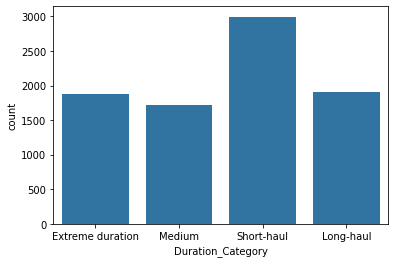

In [20]:
#Plot 
sns.countplot(data=planes, x='Duration_Category')

In [21]:
print(planes['Duration'].head())

0        19h
1     5h 25m
2     4h 45m
3     2h 25m
4    15h 30m
Name: Duration, dtype: object


In [22]:
# Remove the string character
planes["Duration"] = planes["Duration"].str.replace("h", "")

#Convert to float
planes["Duration"] = pd.to_numeric(planes["Duration"], errors='coerce')

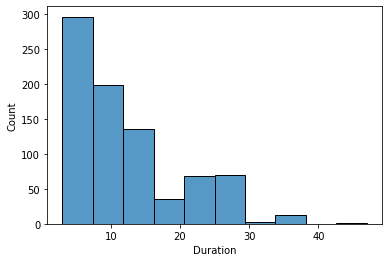

In [23]:
#plot
sns.histplot(data=planes, x="Duration", bins=10)
plt.show()

In [24]:
#Calculating the median for Duration by airline
#Price standard deviation by Airline
planes["airline_price_st_dev"] = planes.groupby("Airline")["Price"].transform(lambda x : x.std())

In [25]:
print(planes[["Airline", "airline_price_st_dev"]].value_counts())

Airline            airline_price_st_dev
Jet Airways        4159.846432             3082
IndiGo             2245.529140             1632
Air India          3692.609285             1399
Multiple carriers  3558.323763              959
SpiceJet           1798.900648              653
Vistara            2888.915498              376
Air Asia           1979.826234              260
GoAir              2764.926625              147
dtype: int64


In [26]:
#Finding mean price by Destination 
planes["airline_destination_mean"] = planes.groupby("Destination")["Price"].transform(lambda x : x.std())
print(planes[["Destination", "airline_destination_mean"]].value_counts())

Destination  airline_destination_mean
Cochin       3624.747052                 3631
Banglore     3749.462686                 2291
Delhi        1490.054091                  998
New Delhi    6387.244136                  720
Hyderabad    4048.357044                  562
Kolkata      2251.877557                  306
dtype: int64


### Handling outliers using the interquartile range

- IOR = 75th - 25th percentile
- Uppper Outliers > 75th percentile
- Lower Outliers < 25th percentile 

### Why look for outliers 

- Outliers are extreme values (may not accurately represent our data)
- Can change the mean and standard deviation
- Statistical tests and machine learning models needs normally distributed data

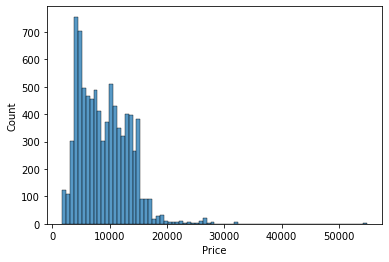

In [27]:
#plot 
sns.histplot(data=planes, x="Price")
plt.show()

In [28]:
#Finding the 75th and 25th percentile 
price_seventy_fifth = planes["Price"].quantile(0.75)
price_twenty_fifth = planes["Price"].quantile(0.25)

#Calculating iqr
price_iqr = price_seventy_fifth - price_twenty_fifth
price_iqr

7014.0

In [29]:
#Calculating the thresholds 
upper = price_seventy_fifth + (1.5 * price_iqr)
lower = price_twenty_fifth - (1.5 * price_iqr)

In [30]:
#Removing the outliers from planes and subsetting the data
planes = planes[(planes["Price"] > lower) & (planes["Price"] < upper)]

In [31]:
print(planes["Price"].describe())

count     8438.000000
mean      8877.466046
std       4001.838236
min       1759.000000
25%       5224.000000
50%       8372.000000
75%      12121.000000
max      22270.000000
Name: Price, dtype: float64


### Generating hypotheses

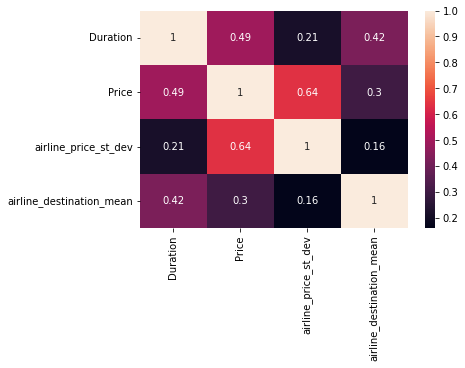

In [32]:
sns.heatmap(planes.corr(), annot=True)
plt.show()

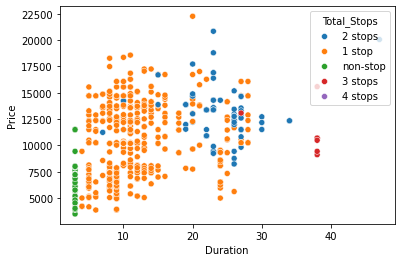

In [33]:
#Spurious Correlation
sns.scatterplot(data=planes, x="Duration", y="Price", hue="Total_Stops")
plt.show()

(1) To detect relationship, differences and patters we use Hypothesis Testing
(2) Hypothesis Testing is required prior to data collection
- Generating a hypothesis or question
- A decision on what statistical test to use

### Data Snooping 

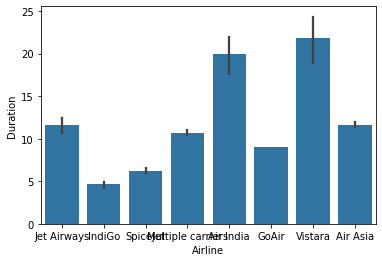

In [34]:
#Generating Hypotheses 
sns.barplot(data=planes, x="Airline", y="Duration")
plt.show()

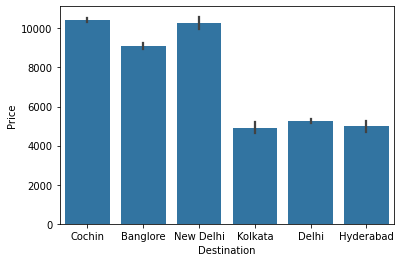

In [35]:
sns.barplot(data=planes, x="Destination", y="Price")
plt.show()